In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets
from torchvision import transforms 

import matplotlib.pyplot as plt

from torch.utils.data import dataloader

C:\Users\Aditya Gupta\Anaconda\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
class NN_Model(nn.Module):
    
    # Constructor
    def __init__(self, In, H, Out):
        super(NN_Model, self).__init__()
        self.linear1 = nn.Linear(In, H)
        self.linear2 = nn.Linear(H, Out)

    # Prediction    
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  
        x = self.linear2(x)
        return x

In [3]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    training_loss=[]
    validation_accuracy=[]
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            training_loss.append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_data))
        validation_accuracy.append(accuracy)
    return training_loss,validation_accuracy

In [4]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [5]:
validation_data = datasets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=2000)
validation_loader = torch.utils.data.DataLoader(dataset=validation_data, batch_size=5000)

In [8]:
model = NN_Model(784,100,10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)
training_results

([2.318143606185913,
  2.3156495094299316,
  2.3086109161376953,
  2.305562734603882,
  2.2999050617218018,
  2.3017067909240723,
  2.297733783721924,
  2.2873449325561523,
  2.2833058834075928,
  2.284287214279175,
  2.2806124687194824,
  2.2770678997039795,
  2.2672414779663086,
  2.2724661827087402,
  2.266580581665039,
  2.271786689758301,
  2.259512186050415,
  2.258180618286133,
  2.2525784969329834,
  2.244119644165039,
  2.2476069927215576,
  2.241213321685791,
  2.238304615020752,
  2.2329373359680176,
  2.228545665740967,
  2.229255437850952,
  2.2222986221313477,
  2.2132246494293213,
  2.216599941253662,
  2.2012882232666016,
  2.208510398864746,
  2.20296311378479,
  2.1945064067840576,
  2.1957240104675293,
  2.1878254413604736,
  2.1889092922210693,
  2.1903555393218994,
  2.1840240955352783,
  2.179657459259033,
  2.173351764678955,
  2.1690075397491455,
  2.1714789867401123,
  2.1600229740142822,
  2.1670985221862793,
  2.156710147857666,
  2.173720359802246,
  2.15602

In [9]:
test_data=pd.read_csv('train.csv')
test_data['Label']=np.nan

In [10]:
test_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [11]:
for i in range(test_data.shape[0]):
    val=test_data.iloc[i,1:785]
    val=torch.tensor(val.values,dtype=torch.int)
    val=val.view(-1,28*28)
    val=val.float()
    pred=model(val)
    pred=torch.argmax(pred)
    pred=int(pred)
    test_data.iloc[i,785]=pred

Predicted: 1
Original: 1


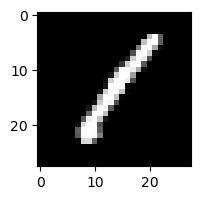

Predicted: 0
Original: 0


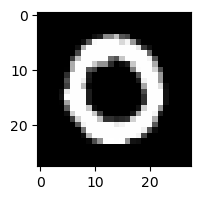

Predicted: 1
Original: 1


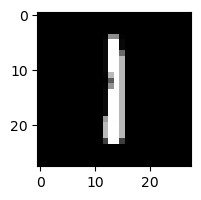

Predicted: 4
Original: 4


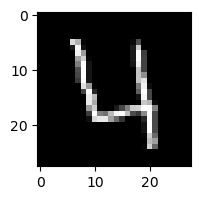

Predicted: 0
Original: 0


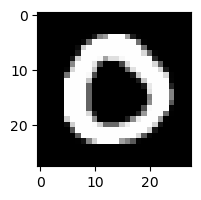

Predicted: 0
Original: 0


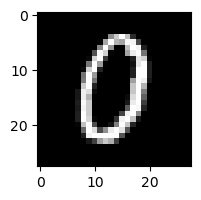

Predicted: 7
Original: 7


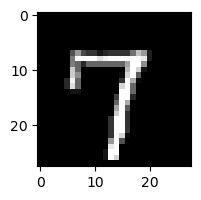

Predicted: 3
Original: 3


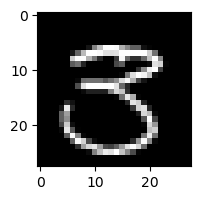

Predicted: 5
Original: 5


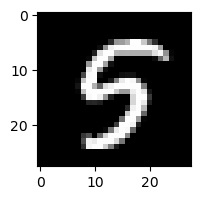

Predicted: 3
Original: 3


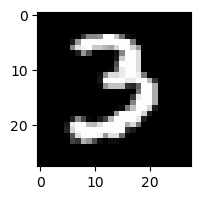

In [12]:
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(test_data.iloc[i,1:785].values.reshape(28, 28), cmap='gray')
    print('Predicted:',int(test_data.iloc[i,785]))
    print('Original:',int(test_data.iloc[i,0]))
    plt.show()